In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np 
import random
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [2]:
data=load_iris()
X=data['data']
y=data['target']

379.1506367082041


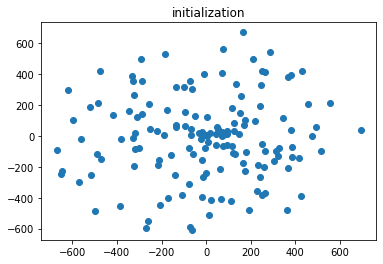

379.658371995028


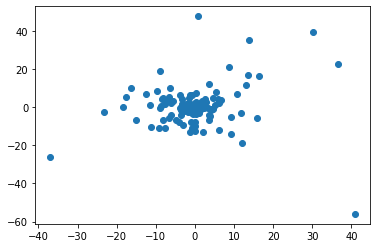

In [10]:

D=distance_matrix(X,X)
class DataBot:
    def __init__(self, position,_):
        self.position = position
        self.payoff = 0
        self.ind=_

    def update_payoff(self, R, D,databots):
        weight=np.array([H_weight(distance_2D_polar(self.position,r.position),R) for r in databots])
        self.payoff=np.average(D[self.ind,:],weights=weight)

def H_weight(r,R):
    result=0
    rs=r/(np.pi*R*R)
    if rs<1:
        result=1-rs
    return result 
def distance_2D_polar(a,b):
    x=polar_to_cartesian(a)
    y=polar_to_cartesian(b)
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

def initialize_databots(N,D,R_max):
    databots = []
    for _ in range(N):
        position = (random.uniform(0,R_max), random.uniform(0, 2 * np.pi))
        databots.append(DataBot(position,_))
        # print(databots.shape)
    updata_all_payoff(R_max,D,databots)
    return databots


def updata_all_payoff(R_max,D,databots):
    for _ in databots:
        _.update_payoff(R_max,D,databots)

def calculate_payoff(databot):
    return sum([_.payoff for _ in databot])

def chance(R,max_range=0.5,min_range=0.05,R_max=75.0):
    return min_range+max_range*(R/R_max)

def update_positions(databots, R, c_R,D):
    for databot in databots:
        if random.random() < c_R:
            new_p=(random.uniform(0, R), random.uniform(0, 2 * np.pi))
            d=DataBot(new_p,databot.ind)
            d.update_payoff(R,D,databots)
            if d.payoff>databot.payoff:
                databot.position=d.position
                databot.payoff=d.payoff
def polar_to_cartesian(polar_pos):
    r, phi = polar_pos
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return (x, y)            
            
def pswarm(databots, D, Rmax, Rmin):
    # print(list(Rmin,int(Rmax),-1))
    # grid_size = (len(D), len(D[0])) 
    for e in range(int(Rmax),Rmin,-1):
        c_R =chance(e)
        L=calculate_payoff(databots)+100
        
        while np.abs(L-calculate_payoff(databots))>0.00005*L:
            # print(L)
            L=calculate_payoff(databots)
            update_positions(databots, e, c_R, D)
    return databots


N = 150 
Rmax = 700
Rmin = 2

databots = initialize_databots(N, D=D,R_max=Rmax)
print(calculate_payoff(databots))
projectedpoints=np.array([list(polar_to_cartesian(_.position)) for _ in databots])
plt.title("initialization")
plt.scatter(projectedpoints[:,0],projectedpoints[:,1])
plt.show()

final_databots = pswarm(databots, D=D, Rmax=Rmax, Rmin=Rmin)
print(calculate_payoff(final_databots))
projectedpoints=np.array([list(polar_to_cartesian(_.position)) for _ in final_databots])
plt.scatter(projectedpoints[:,0],projectedpoints[:,1])
plt.show()



0


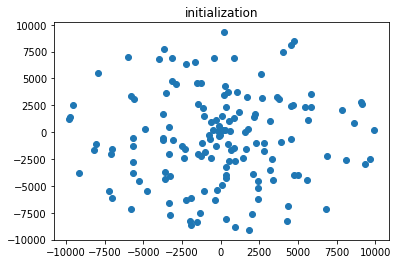

398.9260320166764


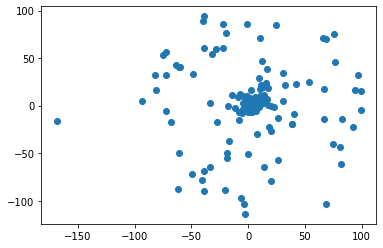

In [8]:
from sklearn.datasets import load_iris
import numpy as np 
import random
from scipy.spatial import distance_matrix

# Load dataset
data = load_iris()
X = data['data']

# Calculate distance matrix
D = distance_matrix(X, X)

# DataBot class definition
class DataBot:
    def __init__(self, position, index):
        self.position = position
        self.payoff = 0  # Initial payoff
        self.index = index  # Reference to the data index

    def update_payoff(self, R, D, databots):
        # Calculate weights based on distance to other databots
        self.payoff = np.average(D[self.index, :], weights=[
            H_weight(distance_2D_polar(self.position, bot.position), R) for bot in databots])

# Supporting functions
def H_weight(r, R):
    return 1 - (r / (np.pi * R ** 2)) if r < R else 0

def distance_2D_polar(a, b):
    x = polar_to_cartesian(a)
    y = polar_to_cartesian(b)
    return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

def polar_to_cartesian(polar_pos):
    r, phi = polar_pos
    return r * np.cos(phi), r * np.sin(phi) 

# Initialization of databots
def initialize_databots(N, grid_size, D, R):
    databots = []
    for i in range(N):
        position = (random.uniform(0, R), random.uniform(0, 2 * np.pi))  # Each bot gets a random polar position
        databots.append(DataBot(position, i))
    return databots

# Update all payoffs
def update_all_payoffs(R, D, databots):
    for bot in databots:
        bot.update_payoff(R, D, databots)

# Calculate the total payoff
def calculate_total_payoff(databots):
    return sum(bot.payoff for bot in databots)

# Update the positions according to PSwarm logic
def update_positions(databots, R, D):
    for databot in databots:
        new_position = (random.uniform(0, R), random.uniform(0, 2 * np.pi))
        old_payoff = databot.payoff
        old_position=databot.position
        # Check new position's payoff
        databot.position = new_position
        databot.update_payoff(R, D, databots)

        # Revert to old position if new position is not better
        if databot.payoff < old_payoff:
            databot.position = old_position
            databot.payoff = old_payoff

# PSwarm algorithm
def pswarm(databots, D, R_max, R_min, threshold=0.00005, max_iters=1000):
    iteration_counts = 0
    while R_max > R_min and iteration_counts < max_iters:
        update_all_payoffs(R_max, D, databots)  # Update payoffs initially
        last_total_payoff = calculate_total_payoff(databots)
        update_positions(databots, R_max, D)
        current_total_payoff = calculate_total_payoff(databots)

        # Break if changes in payoff fall below the threshold
        if abs(last_total_payoff - current_total_payoff) < threshold * last_total_payoff:
            break

        iteration_counts += 1
        R_max *= 0.95  # Decrease range to intensify search

    return databots

# Initial parameters
N = X.shape[0]  # Number of DataBots equals number of data points
R_max = max(D.flatten()) / 2  # Maximum range
R_max=10000
R_min = R_max * 0.01  # Minimum range

# Initialize databots with data indices and max range
databots = initialize_databots(N, grid_size=(R_max, R_max), D=D, R=R_max)
print(calculate_payoff(databots))
projectedpoints=np.array([list(polar_to_cartesian(_.position)) for _ in databots])
plt.title("initialization")
plt.scatter(projectedpoints[:,0],projectedpoints[:,1])
plt.show()

# Perform PSwarm optimization
final_databots = pswarm(databots, D=D, R_max=R_max, R_min=R_min)
# databots = initialize_databots(N, D=D,R_max=Rmax)

# final_databots = pswarm(databots, D=D, Rmax=Rmax, Rmin=Rmin)
print(calculate_payoff(final_databots))
projectedpoints=np.array([list(polar_to_cartesian(_.position)) for _ in final_databots])
plt.scatter(projectedpoints[:,0],projectedpoints[:,1])
plt.show()

In [42]:
import numpy as np

def calculate_distance(vec1, vec2):
    # Calculate Euclidean distance between two vectors
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def determine_bmu(t, net, m):
    # Identify the best matching unit (BMU) for a given input
    bmu_idx = np.array([0, 0])
    min_dist = np.iinfo(np.int).max
    
    # Calculate the high-dimensional distance to each neuron
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            sq_dist = calculate_distance(w, t)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
                
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    return (bmu, bmu_idx)

def train_som(data, net, iterations, learning_rate):
    # Train SOM
    for i in range(iterations):
        # Decrease learning rate over time
        lr = learning_rate * (1 - (i / iterations))
        
        for data_point in data:
            t = data_point.reshape(np.array([data_point.shape[0], 1]))
            bmu, bmu_idx = determine_bmu(t, net, data_point.shape[0])
            
            # Apply neighborhood function and update weights
            # This part is pseudocode and will vary based on your exact neighborhood function
            # net = update_weights(net, bmu, bmu_idx, t, lr)
            pass

def calculate_u_matrix(net, m, grid_size):
    umatrix = np.zeros((grid_size, grid_size))
    for x in range(grid_size):
        for y in range(grid_size):
            sum_dists = 0
            count = 0
            for i in [-1, 0, 1]:
                for j in [-1, 0, 1]:
                    if (x+i) >= 0 and (x+i) < grid_size and (y+j) >= 0 and (y+j) < grid_size:
                        if i == 0 and j == 0:
                            continue
                        weight = net[x+i, y+j, :].reshape(m, 1)
                        dist = calculate_distance(net[x][y], weight)
                        sum_dists += dist
                        count += 1
            umatrix[x][y] = sum_dists / count
    return umatrix

# Define your SOM grid size, number of features, and initialize your network somehow, for example:
grid_size = 400
feature_count = X.shape[0]
data = []
iterations = 1000
learning_rate = 0.01

# Randomly initialize the SOM net
net = np.random.random((grid_size, grid_size, feature_count))

train_som(data, net, iterations, learning_rate)

# After training is complete, calculate the U-matrix
u_matrix = calculate_u_matrix(net, feature_count, grid_size)

# Now you can use u_matrix for further visualization or analysis
print(u_matrix)


[[62.16708818 60.27033491 59.87278562 ... 58.93269474 60.31964571
  60.29537576]
 [64.14208995 60.53211143 60.32188912 ... 60.47181852 60.95800559
  61.20916021]
 [61.26434173 61.65264252 60.99918972 ... 61.14288862 62.11991812
  61.11689948]
 ...
 [60.54888116 60.52188706 61.9044234  ... 63.24084744 61.20900265
  61.2897855 ]
 [60.14961589 61.47683153 62.48468349 ... 61.46476344 62.23716392
  61.87779015]
 [60.28336265 60.52578476 62.82520426 ... 62.81650644 62.79003677
  62.41084766]]


In [22]:
import numpy as np
from minisom import MiniSom    
import matplotlib.pyplot as plt

def calc_umatrix(weight_matrix, x, y):
    """
    Calculate U-Matrix from SOM's weight matrix
    :param weight_matrix: SOM's weights
    :param x: x dimension of the SOM
    :param y: y dimension of the SOM
    :return: U-Matrix as a 2-D numpy array
    """
    umatrix = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            w = weight_matrix[i, j]
            d = 0
            n = 0
            if i - 1 >= 0:
                d += np.sqrt(np.sum((w - weight_matrix[i - 1, j]) ** 2))
                n += 1
            if i + 1 < x:
                d += np.sqrt(np.sum((w - weight_matrix[i + 1, j]) ** 2))
                n += 1
            if j - 1 >= 0:
                d += np.sqrt(np.sum((w - weight_matrix[i, j - 1]) ** 2))
                n += 1
            if j + 1 < y:
                d += np.sqrt(np.sum((w - weight_matrix[i, j + 1]) ** 2))
                n += 1
            umatrix[i, j] = d / n
    return umatrix
lc=np.array([150,2])
# Define SOM dimensions and initialization parameters
som_x, som_y = (int(lc[1]), int(lc[0]))  # Match to your LC dimensions
som = MiniSom(x=som_x, y=som_y, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# # Initialize weights randomly
som.random_weights_init(X)

# # Train SOM with the provided data
# # The number of iterations is a hyperparameter you can experiment with.
n_iterations = 1000
som.train_random(X, n_iterations)

# # After training, calculate the U-Matrix
weights = som.get_weights()
u_matrix = calc_umatrix(weights, som_x, som_y)



In [48]:
import numpy as np

def calculate_distance(vec1, vec2):
    # Calculate Euclidean distance between two vectors
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def determine_bmu(t, net, m):
    # Identify the best matching unit (BMU) for a given input
    bmu_idx = np.array([0, 0])
    min_dist = np.iinfo(np.int).max
    
    # Calculate the high-dimensional distance to each neuron
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            sq_dist = calculate_distance(w, t)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
                
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    return (bmu, bmu_idx)

def train_som(data, net, iterations, learning_rate):
    # Train SOM
    for i in range(iterations):
        # Decrease learning rate over time
        lr = learning_rate * (1 - (i / iterations))
        
        for data_point in data:
            t = data_point.reshape(np.array([data_point.shape[0], 1]))
            bmu, bmu_idx = determine_bmu(t, net, data_point.shape[0])
            
            # Apply neighborhood function and update weights
            # This part is pseudocode and will vary based on your exact neighborhood function
            # net = update_weights(net, bmu, bmu_idx, t, lr)
            pass

def calculate_u_matrix(net, m, grid_size):
    umatrix = np.zeros((grid_size, grid_size))
    for x in range(grid_size):
        for y in range(grid_size):
            sum_dists = 0
            count = 0
            for i in [-1, 0, 1]:
                for j in [-1, 0, 1]:
                    if (x+i) >= 0 and (x+i) < grid_size and (y+j) >= 0 and (y+j) < grid_size:
                        if i == 0 and j == 0:
                            continue
                        weight = net[x+i, y+j, :].reshape(m, 1)
                        dist = calculate_distance(net[x][y], weight)
                        sum_dists += dist
                        count += 1
            umatrix[x][y] = sum_dists / count
    return umatrix

# Define your SOM grid size, number of features, and initialize your network somehow, for example:
grid_size = 10
feature_count = 3
data = []
iterations = 1000
learning_rate = 0.01

# Randomly initialize the SOM net
net = np.random.random((grid_size, grid_size, feature_count))

train_som(data, net, iterations, learning_rate)

# After training is complete, calculate the U-matrix
u_matrix = calculate_u_matrix(net, feature_count, grid_size)

# Now you can use u_matrix for further visualization or analysis
# print(u_matrix)


[]

In [40]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


def calc_umatrix(EsomNeurons, toroid=True):
    def get_neighbors(k, shape):
        M, N = shape
        pos1 = (np.array([k[0]-1, k[0]-1, k[0]-1, k[0], k[0], k[0]+1, k[0]+1, k[0]+1]) % M)
        pos2 = (np.array([k[1]-1, k[1], k[1]+1, k[1]-1, k[1]+1, k[1]-1, k[1], k[1]+1]) % N)
        return np.stack((pos1, pos2), axis=-1)

    shape = EsomNeurons.shape[:2]
    Umatrix = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            neighbors = get_neighbors((i, j), shape)
            wij = EsomNeurons[i, j]
            distances = np.sqrt(((wij - EsomNeurons[neighbors[:, 0], neighbors[:, 1]]) ** 2).sum(axis=1))
            Umatrix[i, j] = distances.mean()
            
    return Umatrix
LC = np.ceil(np.max(projectedpoints, axis=0)) + 1
Lines, Columns = int(LC[0]), int(LC[1])
wts = np.random.uniform(np.min(X), np.max(X), size=(Lines, Columns, X.shape[1])) 
Umatrix = calc_umatrix(wts)
Umatrix

# results = c(X, projectedpoints, lc)


In [81]:
def my_meter(x,y):
    global Umatrix
    return Umatrix[0,0]
pred_label=DBSCAN(metric=my_meter).fit_predict(X)

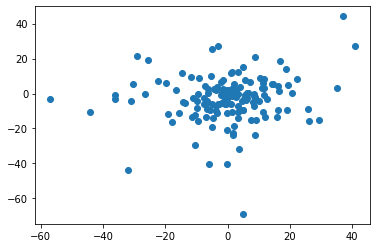

In [75]:
plt.scatter(projectedpoints[:,0],projectedpoints[:,1])

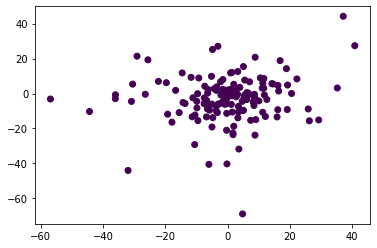

In [84]:
plt.scatter(projectedpoints[:,0],projectedpoints[:,1],c=pred_label)

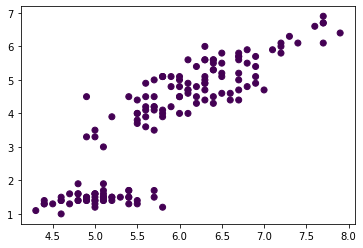

In [86]:
plt.scatter(X[:,0],X[:,2],c=pred_label)

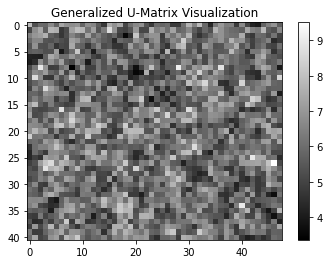

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix



def check_input_distances_or_data(data):
    # Placeholder for actual checks required as per application needs
    return np.array(data)


def rotate_projected_points_if_needed(projected_points):
    max_dims = np.max(projected_points, axis=0)
    lines = int(np.ceil(max_dims[0]))
    columns = int(np.ceil(max_dims[1]))

    if lines > columns:
        projected_points = np.flip(projected_points, axis=1)
        max_dims = np.max(projected_points, axis=0)
        lines, columns = int(np.ceil(max_dims[0])), int(np.ceil(max_dims[1]))
        
    return projected_points, lines, columns


def projected_points_to_grid(ProjectedPoints, lines, columns):
    n, d = ProjectedPoints.shape
    transformed = np.zeros((n, d))
    for i in range(d):
        data_min = np.min(ProjectedPoints[:, i])
        data_max = np.max(ProjectedPoints[:, i])
        transformed[:, i] = (ProjectedPoints[:, i] - data_min) / (data_max - data_min)
    BMUs = np.round(transformed * np.array([lines - 1, columns - 1]))
    return BMUs.astype(int)


def toroidal_distance(p1, p2, shape):
    result = 0
    for i in range(len(p1)):
        dist = min(abs(p1[i] - p2[i]), shape[i] - abs(p1[i] - p2[i]))
        result += dist ** 2
    return np.sqrt(result)


def calculate_umatrix(wts):
    lines, columns, _ = wts.shape
    umatrix = np.zeros((lines, columns))

    for i in range(lines):
        for j in range(columns):
            dist_sum = 0
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue  # skip the neuron itself
                    ni = (i + di) % lines
                    nj = (j + dj) % columns
                    dist_sum += np.linalg.norm(wts[i, j] - wts[ni, nj])
            umatrix[i, j] = dist_sum / 8.0  # normalizing by the number of neighbors (8)

    return umatrix


def U_star_matrix(BMU, data, shape):
    umatrix = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            # Extract the primary BMU data points for this neuron
            primary_data_indices = np.where(BMU == (i, j))[0]
            primary_data = data[primary_data_indices]
            
            # Extract secondary BMU data points for surrounding neurons
            secondary_data = []
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni = (i + di) % shape[0]
                    nj = (j + dj) % shape[1]
                    secondary_data_indices = np.where(BMU == (ni, nj))[0]
                    secondary_data.append(data[secondary_data_indices])

            if len(primary_data) > 0 and secondary_data:
                combined_data = np.vstack(secondary_data)
                umatrix[i, j] = np.mean([np.mean(cdist(primary_data, secondary_data_k)) for secondary_data_k in secondary_data])
            else:
                umatrix[i, j] = np.nan
    return umatrix


def generate_pswarm_visualization(data, projected_points, lc=(None, None), plot=False):
    projected_points, lines, columns = rotate_projected_points_if_needed(projected_points)
    bmus = projected_points_to_grid(projected_points, lines, columns)
    
    # Initialize weights (randomly for now)
    wts = np.random.uniform(low=data.min(), high=data.max(), size=(lines, columns, data.shape[1]))
    
    # assuming the ESOM algorithm has already been executed and wts are the final neuron weights
    umatrix = calculate_umatrix(wts)

    if plot:
        # In a real use case this would be more complex, possibly involving a dynamic visualization
        plt.imshow(umatrix, cmap='gray')
        plt.colorbar()
        plt.title('Generalized U-Matrix Visualization')
        plt.show()
        
    u_star = U_star_matrix(bmus, data, (lines, columns))
    
    return u_star


# Test function
data =X
projected_points = projectedpoints
# lc = (400,400)  # You can provide a fixed LC if you want

u_matrix = generate_pswarm_visualization(data, projected_points, plot=True)
print(u_matrix)


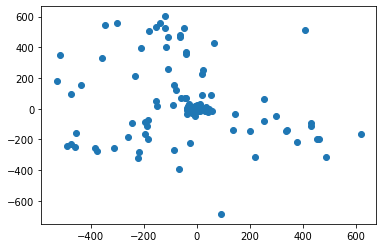

In [40]:
from sklearn.datasets import load_iris
import numpy as np
import random
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

data = load_iris()
X = data['data']
D = distance_matrix(X, X)

def H_weight(r, R):
    result = 0
    rs = r**2 / (np.pi * R**2)
    if rs < 1:
        result = 1 - rs
    return result

def distance_2D_polar(a, b):
    x = polar_to_cartesian(a)
    y = polar_to_cartesian(b)
    return np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

def polar_to_cartesian(polar_pos):
    r, phi = polar_pos
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return (x, y)      

class DataBot:
    def __init__(self, position, index):
        self.position = position
        self.payoff = 0
        self.index = index

    def update_payoff(self, R, D, databots):
        weights = np.array([H_weight(distance_2D_polar(self.position, bot.position), R) for bot in databots])
        self.payoff = np.average(D[self.index, :], weights=weights)

def initialize_databots(N, D, R_max):
    databots = []
    for i in range(N):
        position = (random.uniform(0, R_max), random.uniform(0, 2 * np.pi))
        databots.append(DataBot(position, i))
    update_all_payoff(R_max, D, databots)
    return databots

def update_all_payoff(R, D, databots):
    for bot in databots:
        bot.update_payoff(R, D, databots)

def calculate_total_payoff(databots):
    return sum(bot.payoff for bot in databots)

def chance(R, R_max):
    return 0.05 + 0.5 * (R / R_max)

def update_positions(databots, R, D):
    c_R = chance(R, R_max=R)
    for databot in databots:
        if random.random() < c_R:
            new_position = (random.uniform(0, R), random.uniform(0, 2 * np.pi))
            new_bot = DataBot(new_position, databot.index)
            new_bot.update_payoff(R, D, databots)
            if new_bot.payoff > databot.payoff:
                databot.position = new_position
                databot.payoff = new_bot.payoff

def pswarm(databots, D, R_max, R_min):
    for R in range(int(R_max), R_min, -1):
        last_total_payoff = calculate_total_payoff(databots)
        while True:
            update_positions(databots, R, D)
            current_total_payoff = calculate_total_payoff(databots)
            if np.abs(last_total_payoff - current_total_payoff) <= 0.00005 * last_total_payoff:
                break
            last_total_payoff = current_total_payoff
    return databots

N = len(X)
# R_max = np.max(D.flatten()) / 2
R_max=700
R_min = 5

databots = initialize_databots(N, D, R_max)
final_databots = pswarm(databots, D, R_max, R_min)

projected_points = np.array([polar_to_cartesian(bot.position) for bot in final_databots])
plt.scatter(projected_points[:, 0], projected_points[:, 1])
plt.show()


In [31]:
np.max(D.flatten()) / 2

3.5425979167836705

In [102]:
calculate_total_payoff(final_databots)

376.61679392347855